In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ac =pd.read_csv(r"C:\\Users\\home\\Downloads\\vehicle_dataset\\Accident_Information.csv",low_memory=False,nrows=800000)
vc =pd.read_csv(r"C:\\Users\\home\\Downloads\\vehicle_dataset\\Vehicle_Information.csv",low_memory=False,nrows=800000)#,chunksize=30000,  , quoting=3, on_bad_lines="skip")

In [3]:
print(ac)
df1=pd.DataFrame(ac)
df2=pd.DataFrame(vc)

       Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0       200501BS00001              A           3218.0            NaN   
1       200501BS00002              B            450.0              C   
2       200501BS00003              C              0.0            NaN   
3       200501BS00004              A           3220.0            NaN   
4       200501BS00005   Unclassified              0.0            NaN   
...               ...            ...              ...            ...   
799995  200914K105609              C            409.0              C   
799996  200914K105709   Unclassified              0.0   Unclassified   
799997  200914K106409              C            710.0   Unclassified   
799998  200914K106509   Unclassified              0.0            NaN   
799999  200914K106609   Unclassified              0.0   Unclassified   

        2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0                   0.0           Serious                N

In [6]:
df1.head()
df1.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [7]:
df2.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [8]:
print(df1.shape)
print(df2.shape)

(800000, 34)
(800000, 24)


In [9]:
df1 = df1[['Accident_Index','Date','Time','Latitude','Longitude','Number_of_Vehicles','Number_of_Casualties','Weather_Conditions','Road_Surface_Conditions','Light_Conditions','Urban_or_Rural_Area','Speed_limit','Accident_Severity','Day_of_Week','Local_Authority_(District)']]


In [10]:
df1.head()

,Accident_Index,Date,Time,Latitude,Longitude,Number_of_Vehicles,Number_of_Casualties,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Urban_or_Rural_Area,Speed_limit,Accident_Severity,Day_of_Week,Local_Authority_(District)
0,200501BS00001,2005-01-04,17:42,51.489096,-0.191170,1,1,Raining no high winds,Wet or damp,Daylight,Urban,30,Serious,Tuesday,Kensington and Chelsea
1,200501BS00002,2005-01-05,17:36,51.520075,-0.211708,1,1,Fine no high winds,Dry,Darkness - lights lit,Urban,30,Slight,Wednesday,Kensington and Chelsea
2,200501BS00003,2005-01-06,00:15,51.525301,-0.206458,2,1,Fine no high winds,Dry,Darkness - lights lit,Urban,30,Slight,Thursday,Kensington and Chelsea
3,200501BS00004,2005-01-07,10:35,51.482442,-0.173862,1,1,Fine no high winds,Dry,Daylight,Urban,30,Slight,Friday,Kensington and Chelsea
4,200501BS00005,2005-01-10,21:13,51.495752,-0.156618,1,1,Fine no high winds,Wet or damp,Darkness - lighting unknown,Urban,30,Slight,Monday,Kensington and Chelsea


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              800000 non-null  object 
 1   Date                        800000 non-null  object 
 2   Time                        799917 non-null  object 
 3   Latitude                    799889 non-null  float64
 4   Longitude                   799888 non-null  float64
 5   Number_of_Vehicles          800000 non-null  int64  
 6   Number_of_Casualties        800000 non-null  int64  
 7   Weather_Conditions          800000 non-null  object 
 8   Road_Surface_Conditions     800000 non-null  object 
 9   Light_Conditions            800000 non-null  object 
 10  Urban_or_Rural_Area         800000 non-null  object 
 11  Speed_limit                 800000 non-null  int64  
 12  Accident_Severity           800000 non-null  object 
 13  Day_of_Week   

In [12]:


df1['Date'] = pd.to_datetime((df1['Date']), format= "%Y-%m-%d")



C:\Users\home\AppData\Local\Temp\ipykernel_3616\4111426144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime((df1['Date']), format= "%Y-%m-%d")


In [17]:
df1['month'] = df1['Date'].apply(lambda time: time.month)

In [18]:
df = pd.merge(df1,df2)

In [19]:
df.head()

,Accident_Index,Date,Time,Latitude,Longitude,Number_of_Vehicles,Number_of_Casualties,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200501BS00002,2005-01-05,17:36,51.520075,-0.211708,1,1,Fine no high winds,Dry,Darkness - lights lit,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,2005-01-06,00:15,51.525301,-0.206458,2,1,Fine no high winds,Dry,Darkness - lights lit,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,2005-01-07,10:35,51.482442,-0.173862,1,1,Fine no high winds,Dry,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,2005-01-10,21:13,51.495752,-0.156618,1,1,Fine no high winds,Wet or damp,Darkness - lighting unknown,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,2005-01-11,12:40,51.515540,-0.203238,2,1,Raining no high winds,Wet or damp,Daylight,...,None,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


In [20]:
df.shape

(542632, 39)

In [21]:
#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

C:\Users\home\AppData\Local\Temp\ipykernel_3616\2831236610.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.','')
C:\Users\home\AppData\Local\Temp\ipykernel_3616\2831236610.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(','')
C:\Users\home\AppData\Local\Temp\ipykernel_3616\2831236610.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')','')


In [22]:
df.columns

Index(['accident_index', 'date', 'time', 'latitude', 'longitude',
       'number_of_vehicles', 'number_of_casualties', 'weather_conditions',
       'road_surface_conditions', 'light_conditions', 'urban_or_rural_area',
       'speed_limit', 'accident_severity', 'day_of_week',
       'local_authority_district', 'month', 'age_band_of_driver',
       'age_of_vehicle', 'driver_home_area_type', 'driver_imd_decile',
       'engine_capacity_cc', 'hit_object_in_carriageway',
       'hit_object_off_carriageway', 'journey_purpose_of_driver',
       'junction_location', 'make', 'model', 'propulsion_code',
       'sex_of_driver', 'skidding_and_overturning', 'towing_and_articulation',
       'vehicle_leaving_carriageway', 'vehicle_locationrestricted_lane',
       'vehicle_manoeuvre', 'vehicle_reference', 'vehicle_type',
       'was_vehicle_left_hand_drive', 'x1st_point_of_impact', 'year'],
      dtype='object')

In [23]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

driver_imd_decile                  26.087846
model                              17.064972
age_of_vehicle                     14.499698
engine_capacity_cc                  9.316627
propulsion_code                     7.454223
longitude                           0.011057
latitude                            0.010873
time                                0.009399
vehicle_locationrestricted_lane     0.002211
skidding_and_overturning            0.000000
junction_location                   0.000000
make                                0.000000
sex_of_driver                       0.000000
vehicle_leaving_carriageway         0.000000
towing_and_articulation             0.000000
hit_object_off_carriageway          0.000000
vehicle_manoeuvre                   0.000000
vehicle_reference                   0.000000
vehicle_type                        0.000000
was_vehicle_left_hand_drive         0.000000
x1st_point_of_impact                0.000000
journey_purpose_of_driver           0.000000
accident_i

In [24]:
df.isnull().sum()

accident_index                          0
date                                    0
time                                   51
latitude                               59
longitude                              60
number_of_vehicles                      0
number_of_casualties                    0
weather_conditions                      0
road_surface_conditions                 0
light_conditions                        0
urban_or_rural_area                     0
speed_limit                             0
accident_severity                       0
day_of_week                             0
local_authority_district                0
month                                   0
age_band_of_driver                      0
age_of_vehicle                      78680
driver_home_area_type                   0
driver_imd_decile                  141561
engine_capacity_cc                  50555
hit_object_in_carriageway               0
hit_object_off_carriageway              0
journey_purpose_of_driver         

In [25]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

In [26]:
df['age_of_vehicle'].describe()

count    463952.000000
mean          6.031723
std           4.437090
min           1.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          85.000000
Name: age_of_vehicle, dtype: float64

In [27]:
#fillna by 7 
df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], 
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])


In [28]:
#model
df['model'].value_counts()/df.shape[0]*100

CLIO DYNAMIQUE 16V       0.628419
TRANSIT 350 LWB TD       0.452793
PUNTO ACTIVE             0.342037
PUNTO ACTIVE 8V          0.327478
MONDEO VERONA            0.253579
                           ...   
5 FURANO DIESEL          0.000184
CABSTAR 35.13 S/C MWB    0.000184
411 VARIANT              0.000184
MASTER LM39 DCI 120      0.000184
CB 125 TD-C              0.000184
Name: model, Length: 17331, dtype: float64

In [29]:
df['model'].describe()

count                 450032
unique                 17331
top       CLIO DYNAMIQUE 16V
freq                    3410
Name: model, dtype: object

In [30]:
df['model'].fillna(method='ffill', inplace=True)

In [31]:

df['engine_capacity_cc'].describe()

count    492077.000000
mean       2246.698131
std        2279.320761
min           2.000000
25%        1328.000000
50%        1753.000000
75%        1998.000000
max       96000.000000
Name: engine_capacity_cc, dtype: float64

In [32]:

q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3003.0
323.0


In [33]:
df = df[df['engine_capacity_cc']<=ecmax]

In [34]:
df = df[df['engine_capacity_cc']>=ecmin]

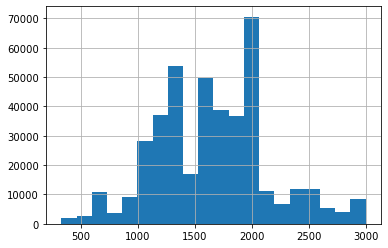

In [35]:
df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')

In [36]:
df['engine_capacity_cc'].describe()

count    419755.000000
mean       1666.361454
std         500.362795
min         329.000000
25%        1332.000000
50%        1598.000000
75%        1995.000000
max        3000.000000
Name: engine_capacity_cc, dtype: float64

In [37]:
df['engine_capacity_cc'].mean()

1666.3614537051376

In [38]:
df['engine_capacity_cc'].fillna(1652, inplace=True)

In [39]:
df.isnull().sum()

accident_index                      0
date                                0
time                               38
latitude                           38
longitude                          39
number_of_vehicles                  0
number_of_casualties                0
weather_conditions                  0
road_surface_conditions             0
light_conditions                    0
urban_or_rural_area                 0
speed_limit                         0
accident_severity                   0
day_of_week                         0
local_authority_district            0
month                               0
age_band_of_driver                  0
age_of_vehicle                      0
driver_home_area_type               0
driver_imd_decile                   0
engine_capacity_cc                  0
hit_object_in_carriageway           0
hit_object_off_carriageway          0
journey_purpose_of_driver           0
junction_location                   0
make                                0
model       

In [40]:

df['vehicle_locationrestricted_lane'].value_counts()

0.0    413599
9.0      2399
6.0      1059
2.0       848
8.0       577
1.0       379
3.0       300
7.0       231
5.0       178
4.0       173
Name: vehicle_locationrestricted_lane, dtype: int64

In [41]:
df['vehicle_locationrestricted_lane'].describe()

count    419743.000000
mean          0.092283
std           0.832356
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: vehicle_locationrestricted_lane, dtype: float64

In [42]:
df['vehicle_locationrestricted_lane'].fillna(df['vehicle_locationrestricted_lane'].mean(),inplace=True)

In [43]:
df['time'].value_counts()

17:30    4132
17:00    4041
18:00    3637
16:00    3634
16:30    3530
         ... 
03:39       7
04:52       7
04:54       6
03:21       6
04:34       4
Name: time, Length: 1439, dtype: int64

In [44]:
df['time'].describe()

count     419717
unique      1439
top        17:30
freq        4132
Name: time, dtype: object

In [45]:
df['time'].fillna(df['time'].describe().top,inplace=True)

In [46]:
df['longitude'].value_counts()

-0.977611    35
-0.816789    28
-1.192286    25
-1.234393    23
-0.923276    21
             ..
-0.571557     1
-0.717890     1
-0.589627     1
-0.631675     1
-1.468543     1
Name: longitude, Length: 299133, dtype: int64

In [47]:
df['longitude'].describe()

count    419716.000000
mean         -1.483234
std           1.347444
min          -7.491830
25%          -2.382892
50%          -1.491270
75%          -0.286261
max           1.758337
Name: longitude, dtype: float64

In [48]:
df['longitude'].fillna(df['longitude'].describe().mean(),inplace=True)

In [49]:
df['latitude'].value_counts()

52.949719    35
53.083165    28
52.955058    25
54.968440    25
52.465790    24
             ..
53.664015     1
53.447665     1
53.649762     1
53.617589     1
53.380365     1
Name: latitude, Length: 292468, dtype: int64

In [50]:
df['latitude'].describe()

count    419717.000000
mean         52.669234
std           1.425491
min          49.914513
25%          51.509236
50%          52.474013
75%          53.550911
max          60.604117
Name: latitude, dtype: float64

In [51]:
df['latitude'].fillna(df['latitude'].describe().mean(),inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419755 entries, 2 to 542631
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   accident_index                   419755 non-null  object        
 1   date                             419755 non-null  datetime64[ns]
 2   time                             419755 non-null  object        
 3   latitude                         419755 non-null  float64       
 4   longitude                        419755 non-null  float64       
 5   number_of_vehicles               419755 non-null  int64         
 6   number_of_casualties             419755 non-null  int64         
 7   weather_conditions               419755 non-null  object        
 8   road_surface_conditions          419755 non-null  object        
 9   light_conditions                 419755 non-null  object        
 10  urban_or_rural_area              419755 non-

In [53]:
df.isnull().sum()

accident_index                     0
date                               0
time                               0
latitude                           0
longitude                          0
number_of_vehicles                 0
number_of_casualties               0
weather_conditions                 0
road_surface_conditions            0
light_conditions                   0
urban_or_rural_area                0
speed_limit                        0
accident_severity                  0
day_of_week                        0
local_authority_district           0
month                              0
age_band_of_driver                 0
age_of_vehicle                     0
driver_home_area_type              0
driver_imd_decile                  0
engine_capacity_cc                 0
hit_object_in_carriageway          0
hit_object_off_carriageway         0
journey_purpose_of_driver          0
junction_location                  0
make                               0
model                              0
p

In [54]:
df.dropna(inplace=True)

In [55]:
df.shape

(419753, 39)

In [56]:

df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight", 
                                                                value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",
                                                                value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal", 
                                                                value="Serious")
df.shape

(419753, 40)

In [57]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [58]:
df.engine_capacity_cc_size.value_counts()

medium engine cc    196804
small engine cc     163201
large engine cc      59748
Name: engine_capacity_cc_size, dtype: int64

In [59]:
df['number_of_vehicles']=df['number_of_vehicles'].astype('object')

In [60]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
#apply function   
df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [61]:

df['number_of_vehicles'].value_counts()

2     266531
1      65640
3      61077
4+     26505
Name: number_of_vehicles, dtype: int64

In [62]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "75-100"]

In [139]:

for (row, col) in df.iterrows():

    if str.lower(col.age_band_of_driver) in age1:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='Under 16', inplace=True)

    if str.lower(col.age_band_of_driver) in age2:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='16-25', inplace=True)
    
    if str.lower(col.age_band_of_driver) in age3:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='26-45', inplace=True)
    if str.lower(col.age_band_of_driver) in age4:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='46-65', inplace=True)
    if str.lower(col.age_band_of_driver) in age5:
        df['age_band_of_driver'].replace(to_replace=col.age_band_of_driver, 
                                         value='Over 65', inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419753 entries, 2 to 542631
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   accident_index                   419753 non-null  object        
 1   date                             419753 non-null  datetime64[ns]
 2   time                             419753 non-null  object        
 3   latitude                         419753 non-null  float64       
 4   longitude                        419753 non-null  float64       
 5   number_of_vehicles               419753 non-null  object        
 6   number_of_casualties             419753 non-null  int64         
 7   weather_conditions               419753 non-null  object        
 8   road_surface_conditions          419753 non-null  object        
 9   light_conditions                 419753 non-null  object        
 10  urban_or_rural_area              419753 non-

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


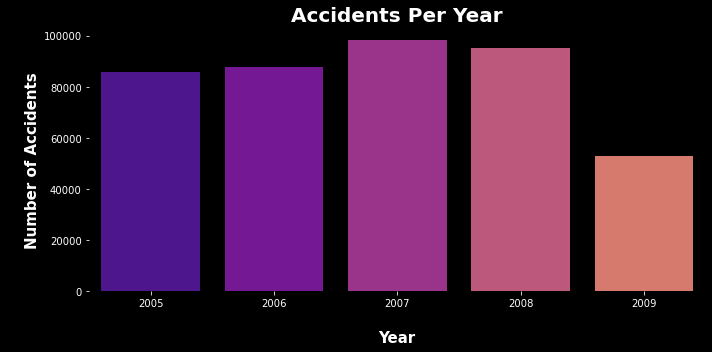

In [66]:
accidentsperyear = df.groupby(['year'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(accidentsperyear.index,accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()


In [70]:
#creating seasons column for ML

#creating season column

def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
           return "winter"
    elif(month == 3 or month == 4 or month == 5):
           return "spring"
    elif(month == 6 or month== 7 or month == 8):
           return "summer"
    else:
           return "fall"

df['season'] = df['month'].apply(getSeason)

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


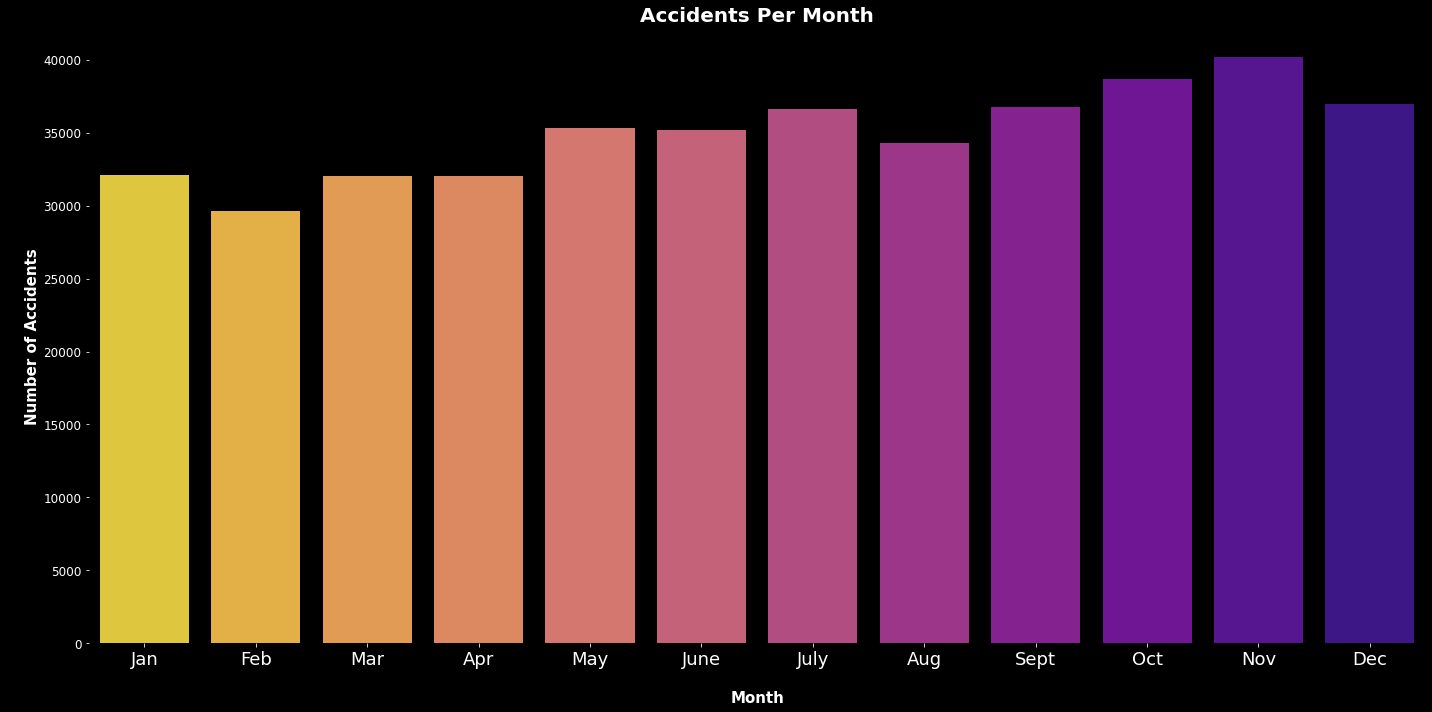

In [71]:
accidentspermonth = df.groupby(['month'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()


In [72]:

df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [73]:

timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [74]:

df['hour'] = df['time'].str[0:2]
 
    
df['hour'] =  pd.to_numeric(df['hour'])

df['hour'] = df['hour'].astype('int')

In [75]:

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"
    

In [76]:

df['time_of_day']= df['hour'].apply(daygroup)   

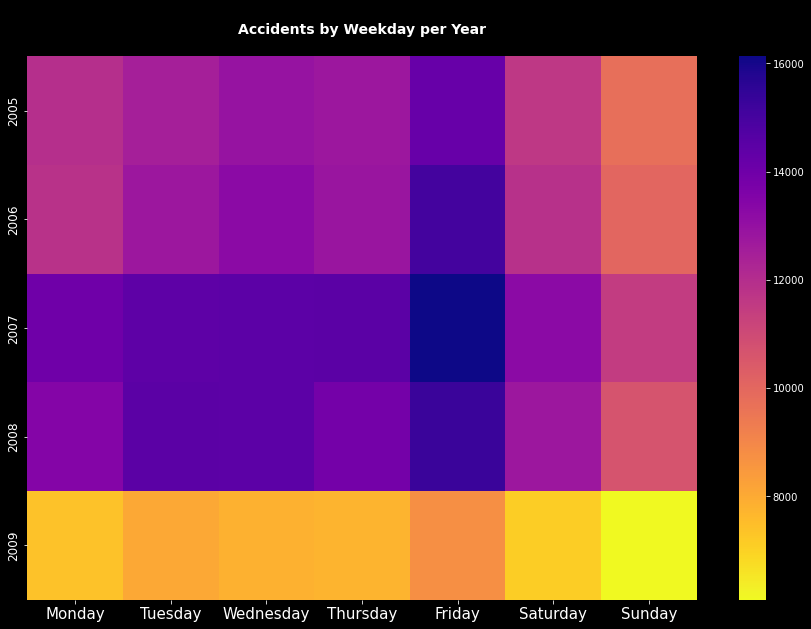

In [77]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df.groupby(['year', 'day_of_week']).size()
accweekday = accweekday.rename_axis(['year', 'day_of_week'])\
                               .unstack('day_of_week')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdayperyear.png')
plt.show()

In [78]:


timeofdaygroups = {'1': "Morning Rush",
                   '2': "Day",
                   '3': "Lunch Rush",
                   '4': "Afternoon",
                   '5': "After Work Rush",
                   '6': "Evening",
                   '7': "Night"}
df['time_of_day']=df['time_of_day'].map(timeofdaygroups)

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


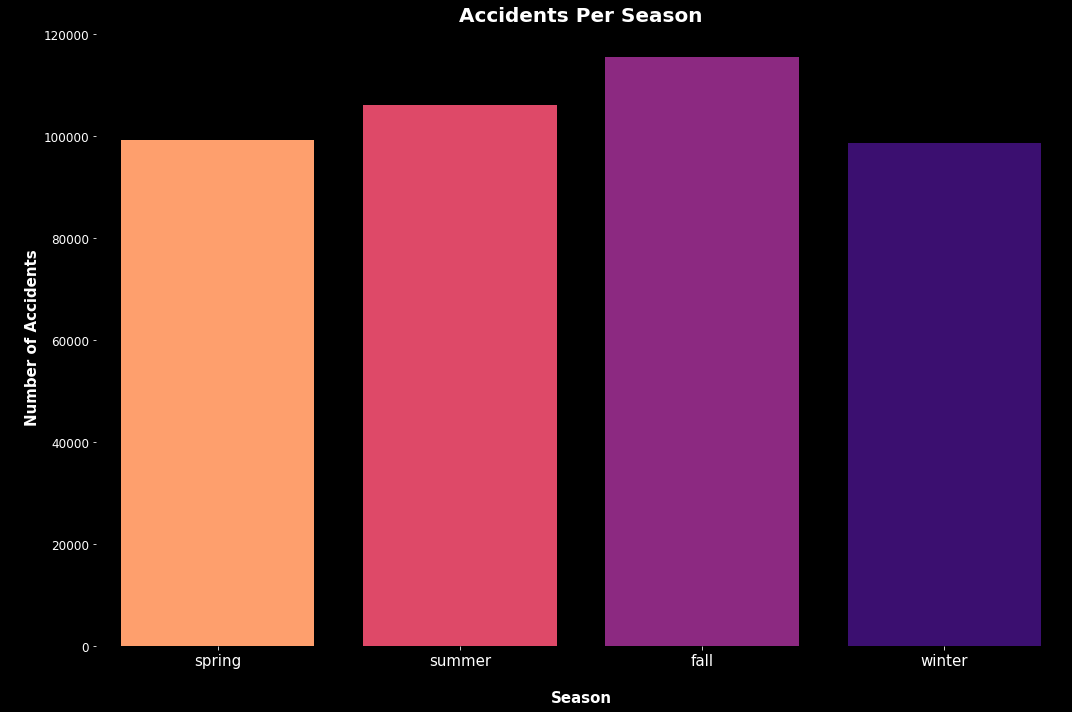

In [79]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['spring', 'summer', 'fall','winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentsperseason.png')


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


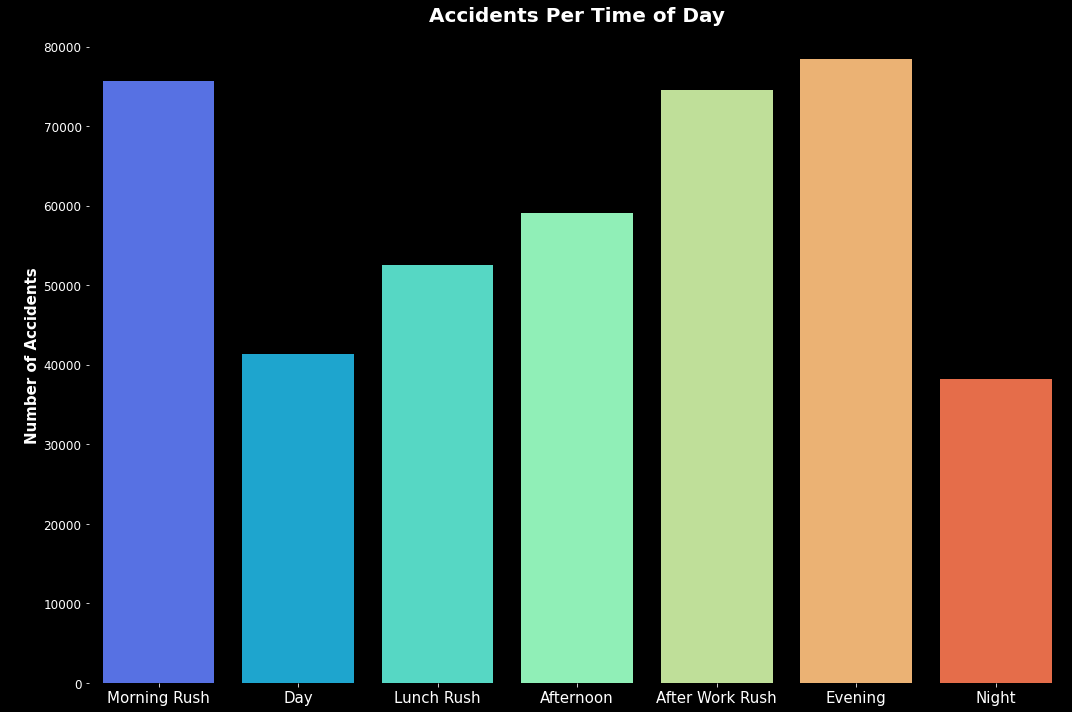

In [80]:
accidentspertod = df.groupby(['time_of_day'])['accident_index'].count()


plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')


In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

In [82]:

corrdf=df.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=df.columns)
corr=corrdf.corr()['accident_seriousness']
corr[np.argsort(corr,axis=0)[::-1]]

accident_seriousness               1.000000
number_of_casualties               0.113783
vehicle_type                       0.094139
x1st_point_of_impact               0.092230
skidding_and_overturning           0.087418
speed_limit                        0.083090
vehicle_leaving_carriageway        0.077682
junction_location                  0.067512
sex_of_driver                      0.062554
hit_object_off_carriageway         0.038217
weekend                            0.034200
engine_capacity_cc_size            0.029858
propulsion_code                    0.024008
age_of_vehicle                     0.023790
model                              0.021228
time_of_day                        0.020093
driver_imd_decile                  0.016017
latitude                           0.016001
time                               0.010832
hour                               0.010002
vehicle_locationrestricted_lane    0.009352
journey_purpose_of_driver          0.008528
was_vehicle_left_hand_drive     

In [83]:
corr_spear=corrdf.corr(method='spearman')['accident_seriousness']
corr_spear[np.argsort(corr_spear,axis=0)[::-1]]

accident_seriousness               1.000000
vehicle_leaving_carriageway        0.108915
vehicle_type                       0.107100
skidding_and_overturning           0.089758
number_of_casualties               0.085399
speed_limit                        0.082070
junction_location                  0.079258
x1st_point_of_impact               0.075725
sex_of_driver                      0.065482
hit_object_off_carriageway         0.041763
weekend                            0.034200
engine_capacity_cc_size            0.033313
propulsion_code                    0.024006
time                               0.021660
model                              0.020927
hour                               0.020848
time_of_day                        0.019471
age_of_vehicle                     0.017644
driver_imd_decile                  0.016126
latitude                           0.015973
journey_purpose_of_driver          0.014763
vehicle_locationrestricted_lane    0.008949
was_vehicle_left_hand_drive     

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419753 entries, 2 to 542631
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   accident_index                   419753 non-null  object        
 1   date                             419753 non-null  datetime64[ns]
 2   time                             419753 non-null  object        
 3   latitude                         419753 non-null  float64       
 4   longitude                        419753 non-null  float64       
 5   number_of_vehicles               419753 non-null  object        
 6   number_of_casualties             419753 non-null  int64         
 7   weather_conditions               419753 non-null  object        
 8   road_surface_conditions          419753 non-null  object        
 9   light_conditions                 419753 non-null  object        
 10  urban_or_rural_area              419753 non-

In [85]:
not_serious = df[(df['accident_seriousness']=="Not Serious")]
serious=df[(df['accident_seriousness']=='Serious')]
print(not_serious.accident_seriousness.value_counts())
print(serious.accident_seriousness.value_counts())

Not Serious    363904
Name: accident_seriousness, dtype: int64
Serious    55849
Name: accident_seriousness, dtype: int64


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\4089363262.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


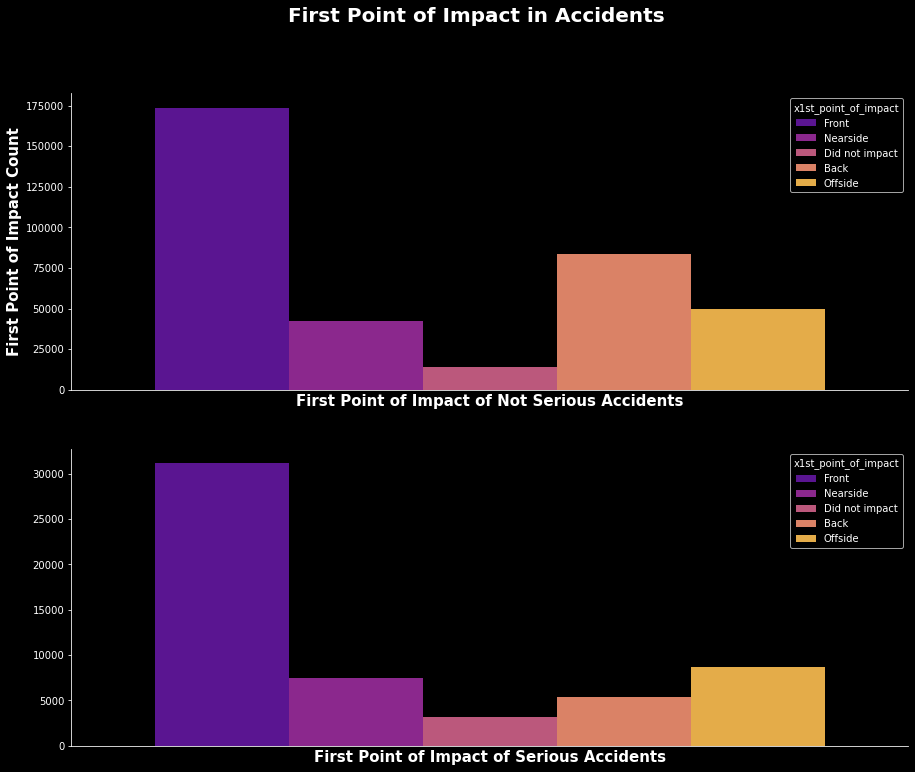

In [86]:
fpoa_order =["Front", "Nearside", "Did not impact", "Back", "Offside"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order,  
              palette="plasma", data=not_serious, ax=ax[0])

ax2 = sns.countplot("accident_seriousness",hue="x1st_point_of_impact", hue_order=fpoa_order, 
              palette="plasma", data=serious, ax=ax[1])

fig.suptitle("First Point of Impact in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('First Point of Impact of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('First Point of Impact of Serious Accidents',  fontsize=15, fontweight="bold")
ax1.set_ylabel('First Point of Impact Count', fontsize=15, fontweight="bold")
ax2.set_ylabel('')
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('x1st_point_of_impact.png')
fig.show()


In [87]:
nstotal=len(not_serious)
setotal =len(serious)

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\3994951935.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


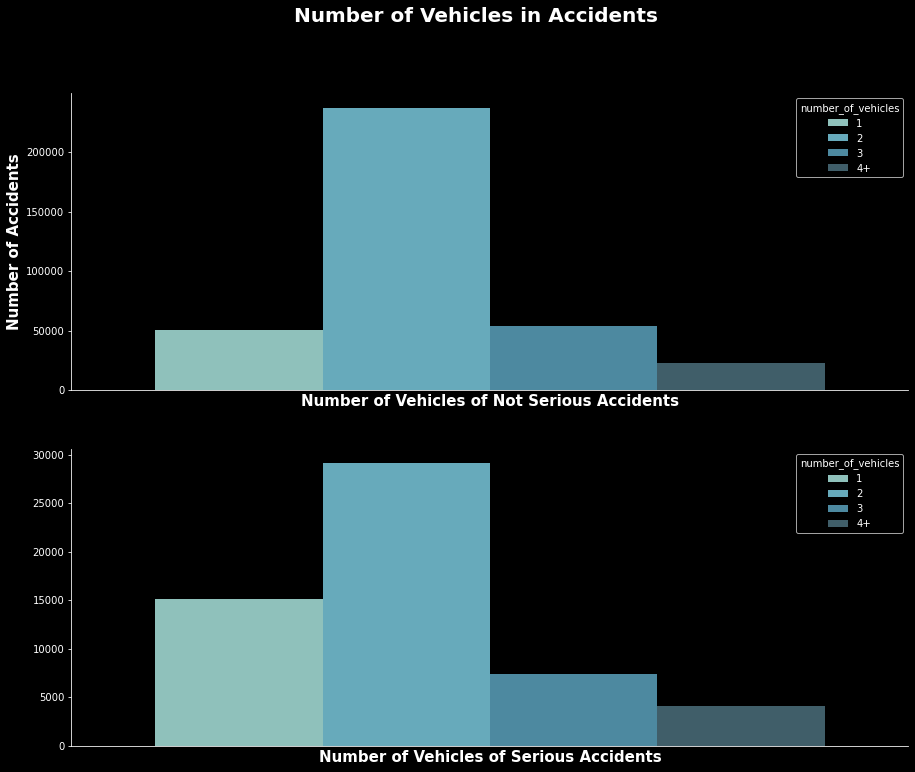

In [88]:

nov_order=["1","2", "3", "4+"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=not_serious, ax=ax[0])

ax2 = sns.countplot("accident_seriousness", hue="number_of_vehicles", hue_order=nov_order,
              palette="GnBu_d", data=serious, ax=ax[1])

fig.suptitle("Number of Vehicles in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Number of Vehicles of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Number of Vehicles of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('number_of_vehicles.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\4033071868.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


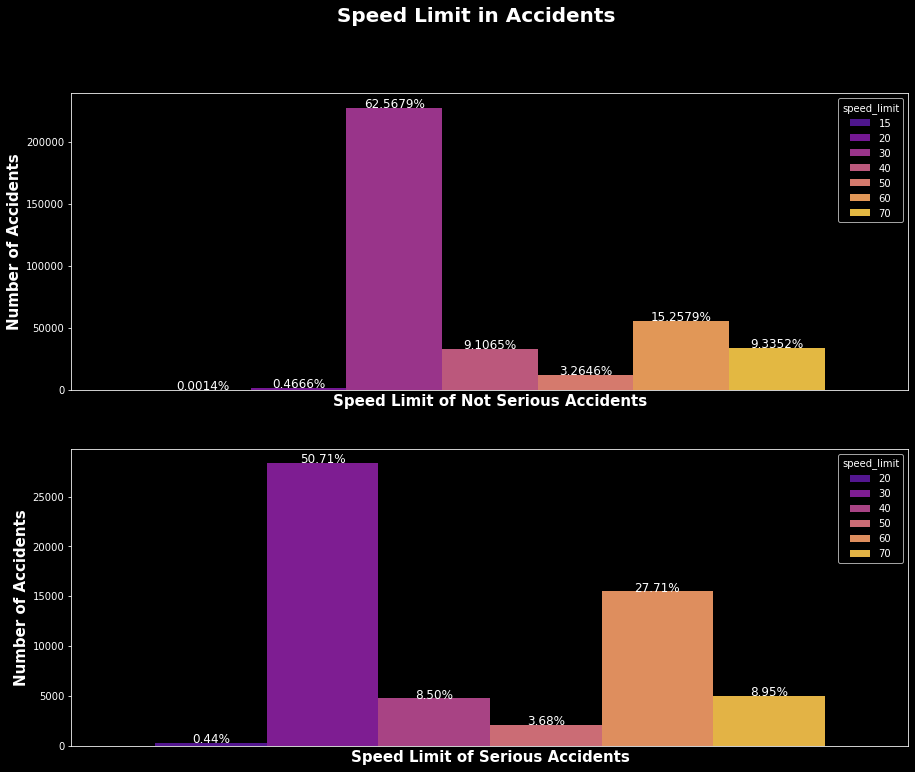

In [89]:
splt_order=[15, 20,30,40,50,60,70]
splt_order2=[20,30,40,50,60,70]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order2,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.style.use('dark_background')
plt.savefig('speed_limit.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\355745086.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


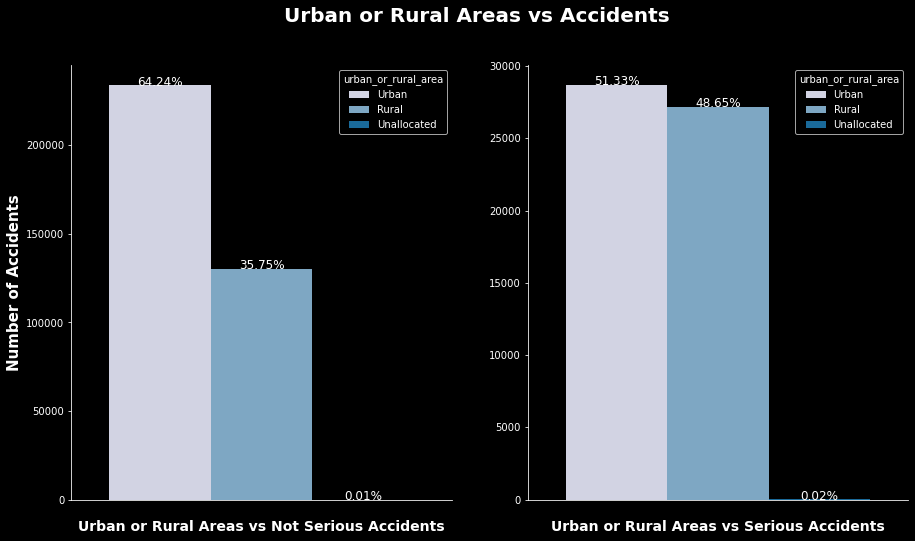

In [90]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness",  hue="urban_or_rural_area",
              palette="PuBu", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Urban or Rural Areas vs Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nUrban or Rural Areas vs Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nUrban or Rural Areas vs Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('urban_or_rural_area.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\652929001.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


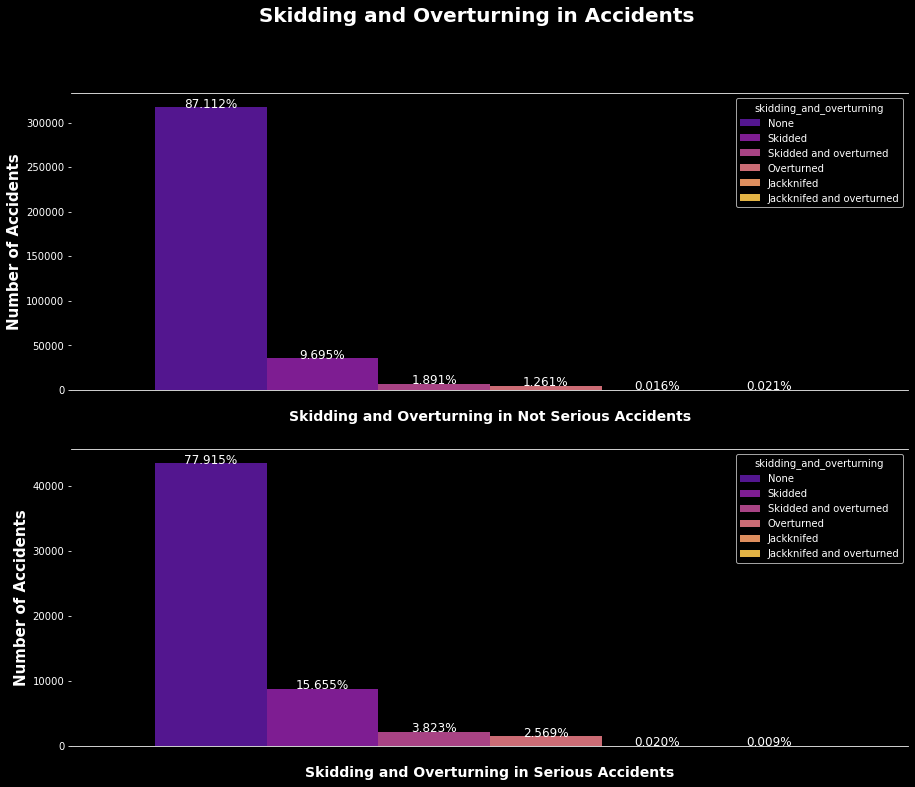

In [91]:
sao_order=["None", "Skidded", "Skidded and overturned", "Overturned", "Jackknifed", 
           "Jackknifed and overturned"]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="skidding_and_overturning", hue_order=sao_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Skidding and Overturning in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSkidding and Overturning in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSkidding and Overturning in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.style.use('dark_background')
plt.savefig('skidding_and_overturning.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\2514694436.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


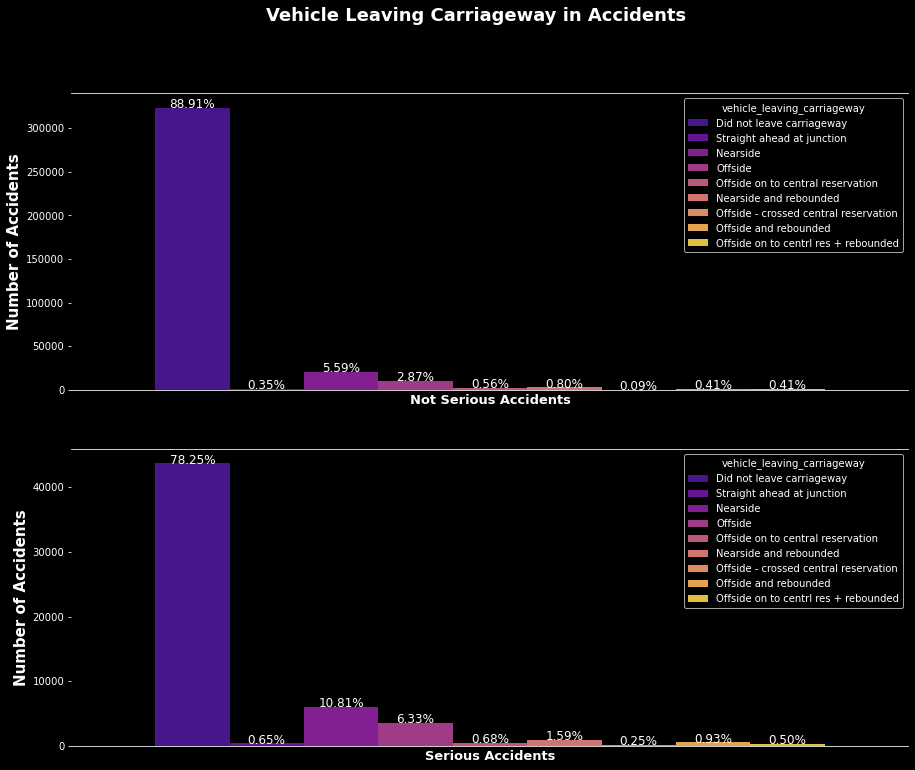

In [92]:
vlc_order=["Did not leave carriageway", "Straight ahead at junction", "Nearside", 
           "Offside", "Offside on to central reservation", "Nearside and rebounded", 
           "Offside - crossed central reservation", "Offside and rebounded", 
           "Offside on to centrl res + rebounded"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_leaving_carriageway", hue_order=vlc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Leaving Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('vehicle_leaving_carriageway.png')
fig.show()



C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\191925865.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


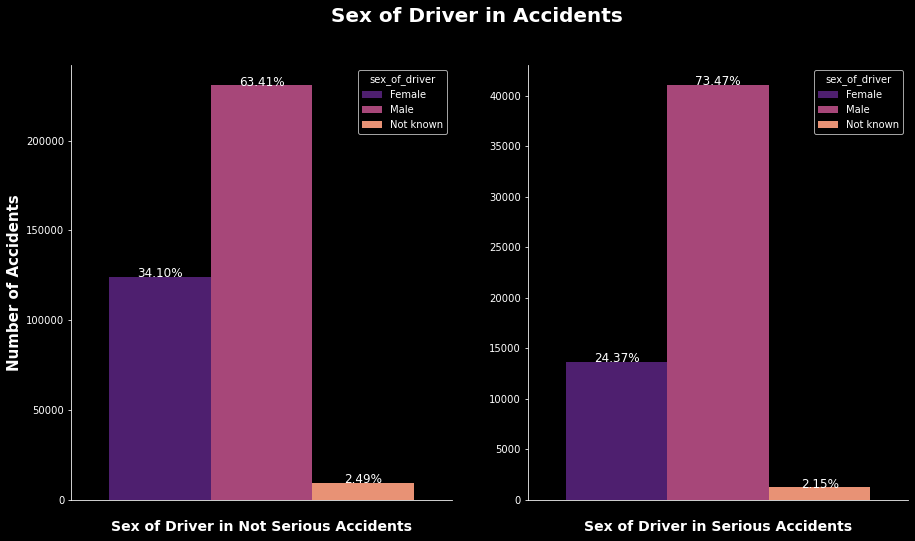

In [93]:
sod_order=["Female", "Male", "Not known"]

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="sex_of_driver", hue_order=sod_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Sex of Driver in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nSex of Driver in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nSex of Driver in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('sex_of_driver.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy 

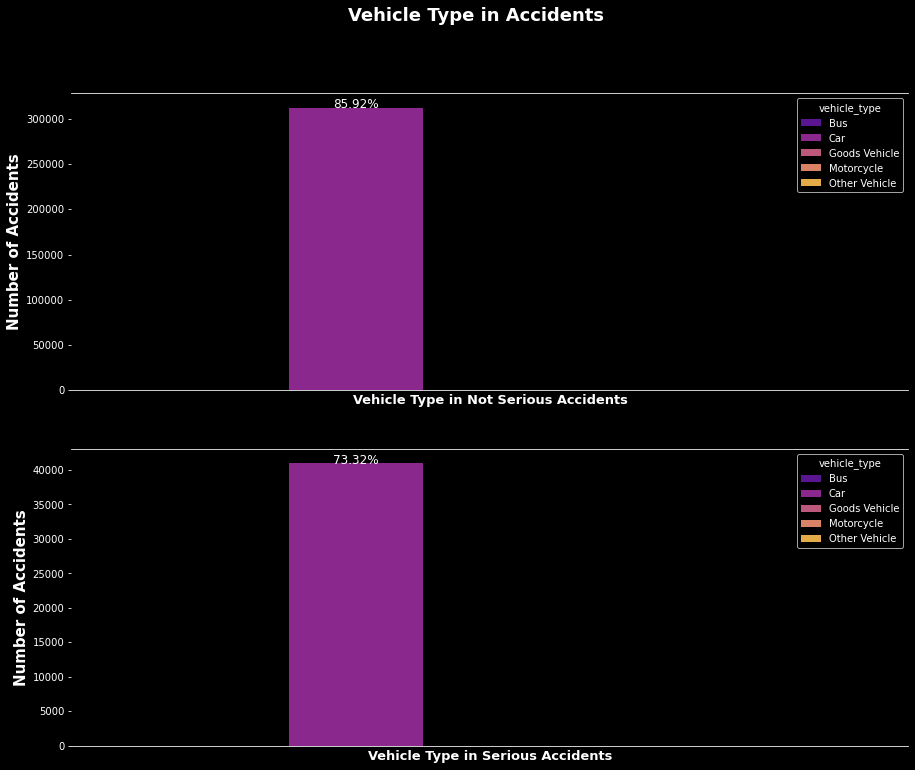

In [94]:
vt_order=['Bus', 'Car', 'Goods Vehicle', 'Motorcycle', 'Other Vehicle']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Type in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Vehicle Type in Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Vehicle Type in Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('vehicle_type.png')
fig.show()

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\4191306276.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


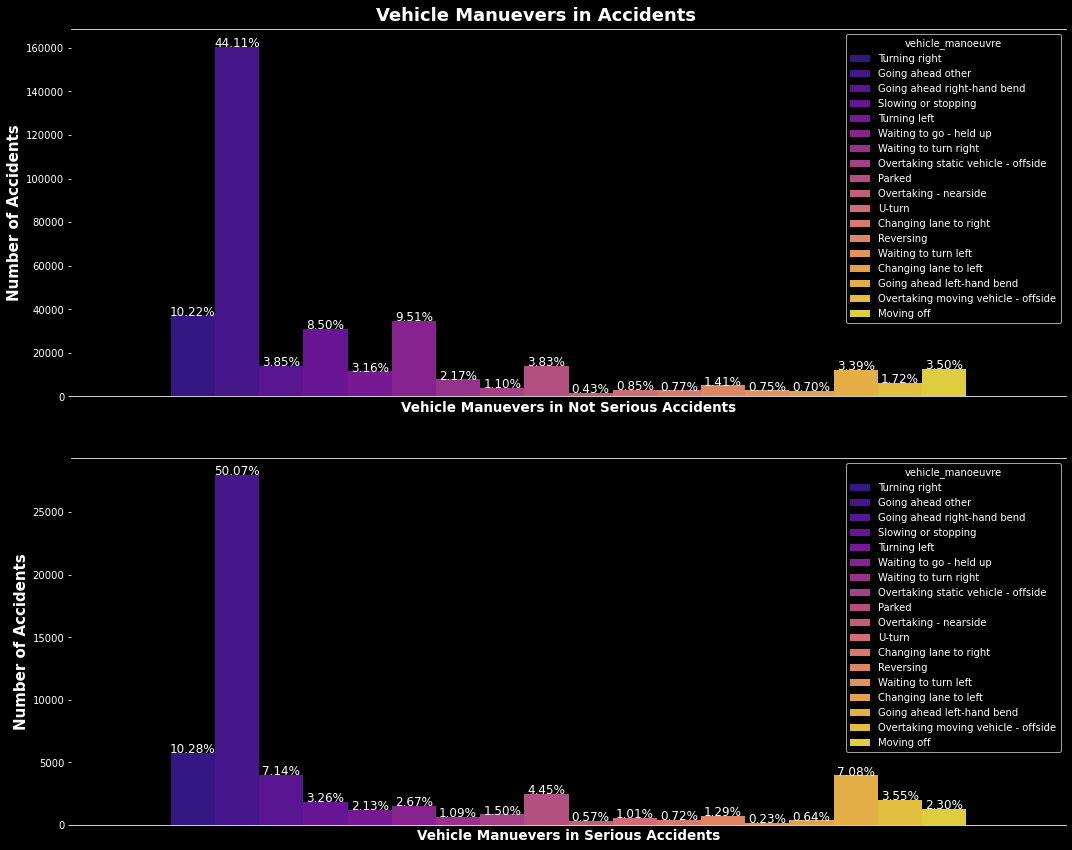

In [95]:
vm_order=['Turning right', 'Going ahead other', 'Going ahead right-hand bend',
          'Slowing or stopping', 'Turning left', 'Waiting to go - held up',
          'Waiting to turn right', 'Overtaking static vehicle - offside' ,
          'Parked', 'Overtaking - nearside', 'U-turn', 'Changing lane to right', 
          'Reversing', 'Waiting to turn left', 'Changing lane to left',
          'Going ahead left-hand bend', 'Overtaking moving vehicle - offside', 'Moving off']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_manoeuvre",hue_order=vm_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Vehicle Manuevers in Accidents", fontsize=18, fontweight="bold")

ax1.set_xlabel('Vehicle Manuevers in Not Serious Accidents\n\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Vehicle Manuevers in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout() # No overlap of subplots
plt.style.use('dark_background')
plt.savefig('vehicle_manoeuvre.png')
fig.show()

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\1279017668.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


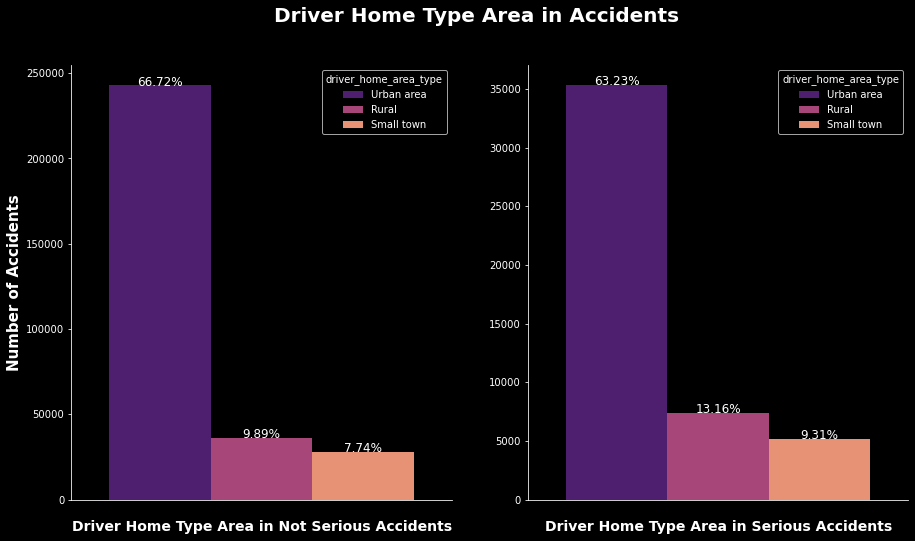

In [96]:
dhoa_order=['Urban area', 'Rural', 'Small town']

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_seriousness", hue="driver_home_area_type", hue_order=dhoa_order,
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Driver Home Type Area in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nDriver Home Type Area in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nDriver Home Type Area in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('driver_home_area.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\2332859904.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


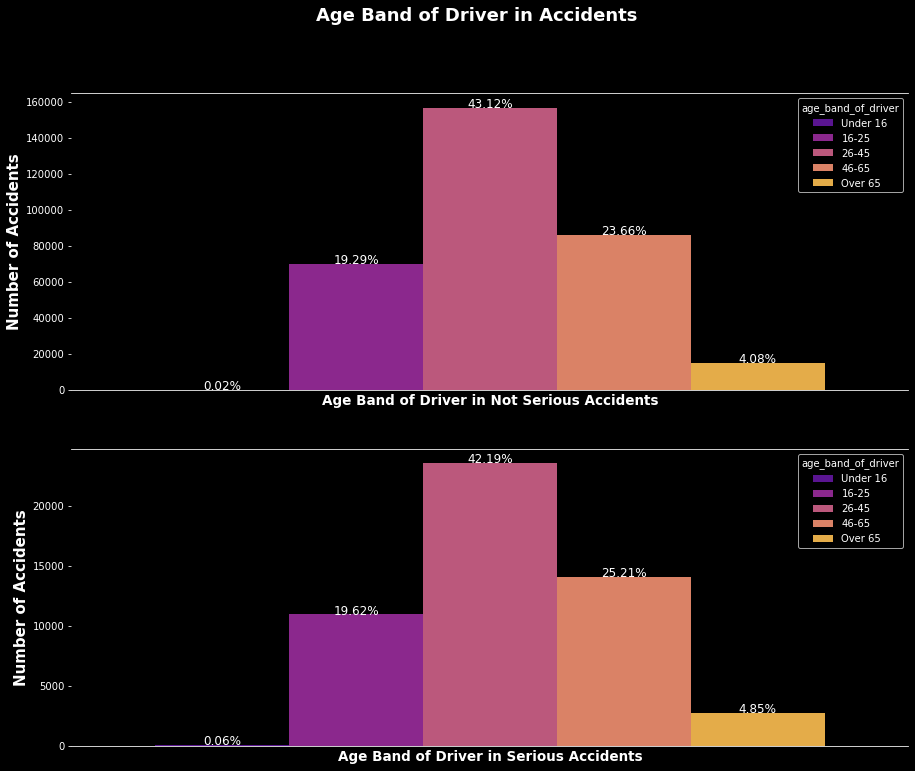

In [97]:
#age_band_of_driver
abod_order=['Under 16', '16-25', '26-45', '46-65','Over 65']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Age Band of Driver in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Age Band of Driver in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Age Band of Driver in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('age_band_of_driver.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
C:\Users\home\AppData\Local\Temp\ipykernel_3616\3800345546.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figur

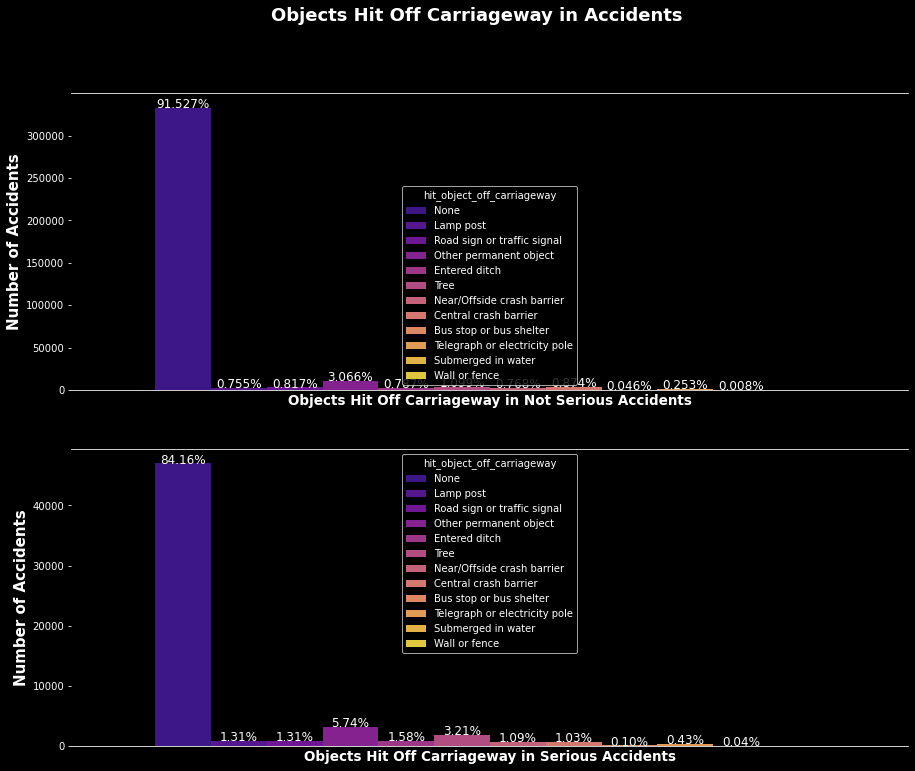

In [98]:
hooffc_order=['None', 'Lamp post', 'Road sign or traffic signal', 'Other permanent object',
              'Entered ditch', 'Tree', 'Near/Offside crash barrier','Central crash barrier',
              'Bus stop or bus shelter', 'Telegraph or electricity pole', 'Submerged in water',
              'Wall or fence']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.3f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="hit_object_off_carriageway", hue_order=hooffc_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Objects Hit Off Carriageway in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Objects Hit Off Carriageway in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Objects Hit Off Carriageway in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.style.use('dark_background')
plt.savefig('hit_object_off_carriageway.png')
fig.show()


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\home\AppData\Local\Temp\ipykernel_3616\4277984953.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


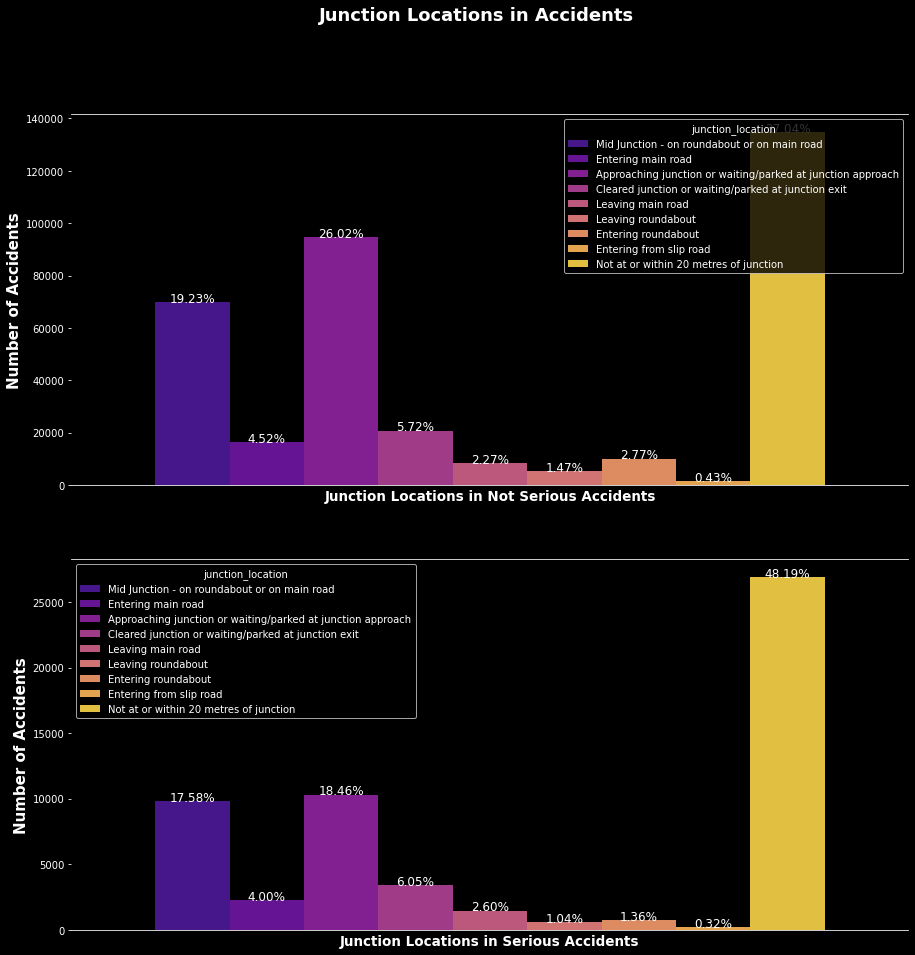

In [99]:
jul_order=['Mid Junction - on roundabout or on main road', 'Entering main road',
           'Approaching junction or waiting/parked at junction approach',
           'Cleared junction or waiting/parked at junction exit', 'Leaving main road',
           'Leaving roundabout', 'Entering roundabout', 'Entering from slip road',
           'Not at or within 20 metres of junction']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,15))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="junction_location", hue_order=jul_order,
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Junction Locations in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Junction Locations in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Junction Locations in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')

plt.savefig('junction_location.png')
fig.show()


In [100]:
df.columns

Index(['accident_index', 'date', 'time', 'latitude', 'longitude',
       'number_of_vehicles', 'number_of_casualties', 'weather_conditions',
       'road_surface_conditions', 'light_conditions', 'urban_or_rural_area',
       'speed_limit', 'accident_severity', 'day_of_week',
       'local_authority_district', 'month', 'age_band_of_driver',
       'age_of_vehicle', 'driver_home_area_type', 'driver_imd_decile',
       'engine_capacity_cc', 'hit_object_in_carriageway',
       'hit_object_off_carriageway', 'journey_purpose_of_driver',
       'junction_location', 'make', 'model', 'propulsion_code',
       'sex_of_driver', 'skidding_and_overturning', 'towing_and_articulation',
       'vehicle_leaving_carriageway', 'vehicle_locationrestricted_lane',
       'vehicle_manoeuvre', 'vehicle_reference', 'vehicle_type',
       'was_vehicle_left_hand_drive', 'x1st_point_of_impact', 'year',
       'accident_seriousness', 'engine_capacity_cc_size', 'season', 'weekend',
       'hour', 'time_of_day'],
  

In [101]:

notif=df.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)


print(df1.shape)
print(notif.shape)
print(intfldtypes.shape)

Objects Index(['accident_index', 'date', 'time', 'number_of_vehicles',
       'weather_conditions', 'road_surface_conditions', 'light_conditions',
       'urban_or_rural_area', 'accident_severity', 'day_of_week',
       'local_authority_district', 'age_band_of_driver', 'age_of_vehicle',
       'driver_home_area_type', 'hit_object_in_carriageway',
       'hit_object_off_carriageway', 'journey_purpose_of_driver',
       'junction_location', 'make', 'model', 'propulsion_code',
       'sex_of_driver', 'skidding_and_overturning', 'towing_and_articulation',
       'vehicle_leaving_carriageway', 'vehicle_manoeuvre', 'vehicle_type',
       'was_vehicle_left_hand_drive', 'x1st_point_of_impact',
       'accident_seriousness', 'engine_capacity_cc_size', 'season',
       'time_of_day'],
      dtype='object')

NonObjects Index(['latitude', 'longitude', 'number_of_casualties', 'speed_limit', 'month',
       'driver_imd_decile', 'engine_capacity_cc',
       'vehicle_locationrestricted_lane', 'vehicle

In [102]:

obj_le= notif.apply(LabelEncoder().fit_transform)

df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)

print(df_ml.shape)

(419753, 45)


In [103]:

X= df_ml.drop(['accident_seriousness'],axis=1)
y= df_ml['accident_seriousness']

In [104]:
df.accident_seriousness.value_counts()

Not Serious    363904
Serious         55849
Name: accident_seriousness, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
print(X.shape)
print(y.shape)

(419753, 44)
(419753,)


In [107]:

res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, test_size=0.3, random_state=105)

In [108]:
df_ml.accident_seriousness.value_counts()

0    363904
1     55849
Name: accident_seriousness, dtype: int64

In [152]:

res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.3, random_state=105)

In [110]:

res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [111]:
not_severe = res_X[res_X.accident_seriousness==0]
severe = res_X[res_X.accident_seriousness==1]

In [112]:
from sklearn.utils import resample


In [113]:
not_severe_decreased = resample(not_severe,
                          replace=True, 
                          n_samples=len(severe), 
                          random_state=27) 

In [114]:
newdf = pd.concat([severe, not_severe_decreased])

In [115]:
newdf.accident_seriousness.value_counts()

1    39182
0    39182
Name: accident_seriousness, dtype: int64

In [151]:
res_X_train = newdf.drop('accident_seriousness', axis=1)
res_y_train = newdf.accident_seriousness

In [117]:
!pip install imblearn

In [127]:
!pip install xgboost

In [132]:
!pip install lightgbm

In [133]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [135]:
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


In [161]:
res_X_train=
res_X_train.shape


(293827, 44)

In [162]:
res_y_train.shape

(293827,)

In [163]:
clf = BaggingClassifier(n_estimators=100, random_state=42)


In [164]:
clf.fit(res_X_train, res_y_train)


BaggingClassifier(n_estimators=100, random_state=42)

In [177]:
classifiers = [
    BaggingClassifier(max_features=X.shape[1], n_estimators=100, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1], 
                           min_samples_split=8, n_estimators=100, random_state=42),
    XGBClassifier(learning_rate=0.05, n_estimators=100, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40)]
    
    


res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, y_pred)
    print(cm)
    
    
   






BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 100.0000%
Cross validation scores: 1.0
Log Loss: 9.99200722162641e-16
[[109259      0]
 [     0  16667]]




AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 100.0000%
Cross validation scores: 1.0
Log Loss: 9.99200722162641e-16
[[109259      0]
 [     0  16667]]




RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 100.0000%
Cross validation scores: 1.0
Log Loss: 9.99200722162641e-16
[[109259      0]
 [     0  16667]]




XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 100.0000%
Cross validation scores: 1.0
Log Loss: 0.0017933535470931866
[[109259      0]
 [     0  16667]]
